In [1]:
import pandas as pd

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('/content/cyberthreat.csv')
print(data)

    Protocol Flag Packet  Sender ID  Receiver ID Source IP Address  \
0        TCP  SYN   HTTP     123456       987654       192.168.0.1   
1        UDP  ACK    DNS     987654       123456          10.0.0.2   
2        TCP  SYN    SSH     789012       345678      192.168.1.10   
3        UDP  ACK    NTP     345678       789012          10.0.0.5   
4        TCP  RST    FTP     234567       456789       192.168.0.5   
..       ...  ...    ...        ...          ...               ...   
745      TCP  SYN    FTP     567890       890123       192.168.1.5   
746      UDP  ACK    DNS     901234       678901         10.0.0.15   
747      TCP  SYN    SSH     234567       456789       192.168.0.5   
748      UDP  ACK    NTP     456789       234567          10.0.0.8   
749      TCP  RST    FTP     678901       901234      192.168.1.10   

    Destination IP Address  Source Port  Destination Port  Packet Size  \
0                 10.0.0.5        12345                80         1024   
1          

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Protocol                750 non-null    object
 1   Flag                    750 non-null    object
 2   Packet                  750 non-null    object
 3   Sender ID               750 non-null    int64 
 4   Receiver ID             750 non-null    int64 
 5   Source IP Address       750 non-null    object
 6   Destination IP Address  750 non-null    object
 7   Source Port             750 non-null    int64 
 8   Destination Port        750 non-null    int64 
 9   Packet Size             750 non-null    int64 
 10  Target Variable         750 non-null    object
dtypes: int64(5), object(6)
memory usage: 64.6+ KB


In [6]:
data.describe()

,Sender ID,Receiver ID,Source Port,Destination Port,Packet Size
count,750.000000,750.000000,750.000000,750.000000,750.000000
mean,576178.760000,582752.624000,3155.512000,9297.088000,959.488000
std,286422.590855,287956.815104,5282.061308,5311.018757,1154.034583
min,123456.000000,123456.000000,20.000000,20.000000,128.000000
25%,345678.000000,345678.000000,25.000000,12345.000000,256.000000
50%,567890.000000,678901.000000,161.000000,12345.000000,512.000000
75%,789012.000000,890123.000000,443.000000,12345.000000,1024.000000
max,987654.000000,987654.000000,12345.000000,12345.000000,4096.000000


In [7]:
print(data.isnull().sum())

Protocol                  0
Flag                      0
Packet                    0
Sender ID                 0
Receiver ID               0
Source IP Address         0
Destination IP Address    0
Source Port               0
Destination Port          0
Packet Size               0
Target Variable           0
dtype: int64


In [8]:
X = data.drop("Receiver ID", axis=1)
y = data["Receiver ID"]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset from CSV
data = pd.read_csv('/content/cyberthreat.csv')

# Separate features and target variable
X = data.drop(columns=['Receiver ID'])  # Features
y = data['Receiver ID']  # Target variable

# Identify categorical columns
categorical_cols = [col for col in X.columns if X[col].dtype == 'object']

# Apply one-hot encoding to categorical columns
preprocessor = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(), categorical_cols)],
    remainder='passthrough'
)
X_encoded = preprocessor.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize the logistic regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Predict the target variable on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix")
print(conf_matrix)

Accuracy: 0.7866666666666666
Classification Report:
              precision    recall  f1-score   support

      123456       0.55      0.55      0.55        11
      234567       0.94      1.00      0.97        17
      345678       0.64      1.00      0.78        27
      456789       1.00      1.00      1.00        15
      567890       0.00      0.00      0.00         6
      678901       0.00      0.00      0.00        13
      789012       1.00      1.00      1.00        25
      890123       0.65      0.92      0.76        12
      901234       0.00      0.00      0.00         7
      987654       1.00      1.00      1.00        17

    accuracy                           0.79       150
   macro avg       0.58      0.65      0.61       150
weighted avg       0.69      0.79      0.73       150

Confusion Matrix
[[ 6  0  0  0  0  5  0  0  0  0]
 [ 0 17  0  0  0  0  0  0  0  0]
 [ 0  0 27  0  0  0  0  0  0  0]
 [ 0  0  0 15  0  0  0  0  0  0]
 [ 0  0  6  0  0  0  0  0  0  0]
 [ 5  0

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

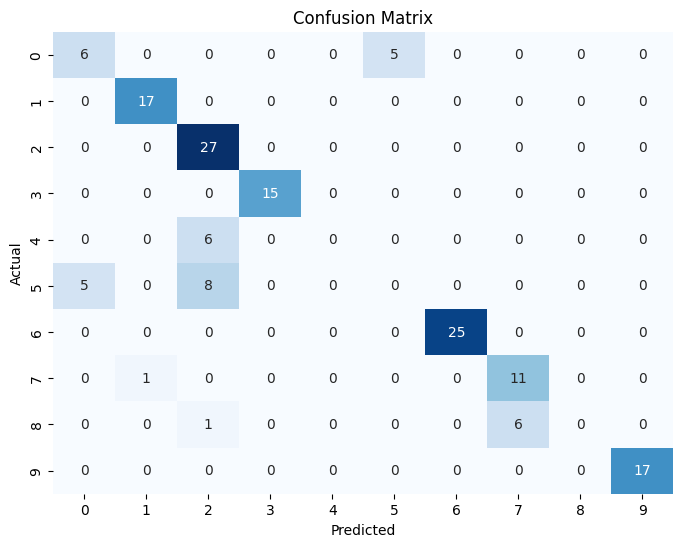

In [13]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [14]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print('KNN predicted values:',y_pred_knn)

KNN predicted values: [567890 567890 678901 987654 234567 345678 890123 345678 456789 789012
 123456 987654 789012 678901 890123 987654 789012 456789 987654 345678
 456789 901234 567890 234567 890123 234567 234567 345678 123456 345678
 456789 123456 345678 987654 789012 345678 678901 123456 678901 123456
 123456 987654 123456 890123 234567 345678 678901 456789 789012 678901
 789012 987654 345678 789012 987654 234567 456789 987654 345678 789012
 456789 789012 789012 456789 901234 456789 890123 678901 123456 901234
 789012 901234 789012 678901 345678 456789 345678 987654 456789 678901
 789012 234567 987654 789012 234567 678901 901234 789012 234567 890123
 789012 234567 234567 890123 678901 234567 345678 987654 345678 234567
 890123 345678 345678 456789 123456 345678 456789 789012 789012 789012
 345678 123456 987654 987654 345678 890123 901234 345678 123456 901234
 234567 789012 345678 987654 678901 789012 789012 456789 345678 456789
 234567 345678 567890 678901 345678 789012 345678 78901

In [15]:
svm = SVC(kernel='linear', C=1)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print('SVM predicted values:',y_pred_svm)

SVM predicted values: [567890 567890 678901 987654 234567 345678 890123 345678 456789 789012
 123456 987654 789012 678901 890123 987654 789012 456789 987654 345678
 456789 901234 567890 234567 890123 234567 234567 345678 123456 345678
 456789 123456 345678 987654 789012 345678 678901 123456 678901 123456
 123456 987654 123456 890123 234567 345678 678901 456789 789012 678901
 789012 987654 345678 789012 987654 234567 456789 987654 345678 789012
 456789 789012 789012 456789 901234 456789 890123 678901 123456 901234
 789012 901234 789012 678901 345678 456789 345678 987654 456789 678901
 789012 234567 987654 789012 234567 678901 901234 789012 234567 890123
 789012 234567 234567 890123 678901 234567 345678 987654 345678 234567
 890123 345678 345678 456789 123456 345678 456789 789012 789012 789012
 345678 123456 987654 987654 345678 890123 901234 345678 123456 901234
 234567 789012 345678 987654 678901 789012 789012 456789 345678 456789
 234567 345678 567890 678901 345678 789012 345678 78901

In [16]:
dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train, y_train)
y_pred_dec_tree = dec_tree.predict(X_test)
print('Decision Tree predicted values:',y_pred_dec_tree)

Decision Tree predicted values: [567890 567890 678901 987654 234567 345678 890123 345678 456789 789012
 123456 987654 789012 678901 890123 987654 789012 456789 987654 345678
 456789 901234 567890 234567 890123 234567 234567 345678 123456 345678
 456789 123456 345678 987654 789012 345678 678901 123456 678901 123456
 123456 987654 123456 890123 234567 345678 678901 456789 789012 678901
 789012 987654 345678 789012 987654 234567 456789 987654 345678 789012
 456789 789012 789012 456789 901234 456789 890123 678901 123456 901234
 789012 901234 789012 678901 345678 456789 345678 987654 456789 678901
 789012 234567 987654 789012 234567 678901 901234 789012 234567 890123
 789012 234567 234567 890123 678901 234567 345678 987654 345678 234567
 890123 345678 345678 456789 123456 345678 456789 789012 789012 789012
 345678 123456 987654 987654 345678 890123 901234 345678 123456 901234
 234567 789012 345678 987654 678901 789012 789012 456789 345678 456789
 234567 345678 567890 678901 345678 789012 34

In [17]:
knn_accuracy = accuracy_score(y_test, y_pred_knn)
knn_precision = precision_score(y_test, y_pred_knn, average='weighted')
knn_recall = recall_score(y_test, y_pred_knn, average='weighted')
knn_confusion_matrix = confusion_matrix(y_test, y_pred_knn)
print('KNN Accuracy:',knn_accuracy)
print('KNN Precision:',knn_precision)
print('KNN Recall:',knn_recall)
print('KNN Confusion Matrix:',knn_confusion_matrix)

KNN Accuracy: 1.0
KNN Precision: 1.0
KNN Recall: 1.0
KNN Confusion Matrix: [[11  0  0  0  0  0  0  0  0  0]
 [ 0 17  0  0  0  0  0  0  0  0]
 [ 0  0 27  0  0  0  0  0  0  0]
 [ 0  0  0 15  0  0  0  0  0  0]
 [ 0  0  0  0  6  0  0  0  0  0]
 [ 0  0  0  0  0 13  0  0  0  0]
 [ 0  0  0  0  0  0 25  0  0  0]
 [ 0  0  0  0  0  0  0 12  0  0]
 [ 0  0  0  0  0  0  0  0  7  0]
 [ 0  0  0  0  0  0  0  0  0 17]]


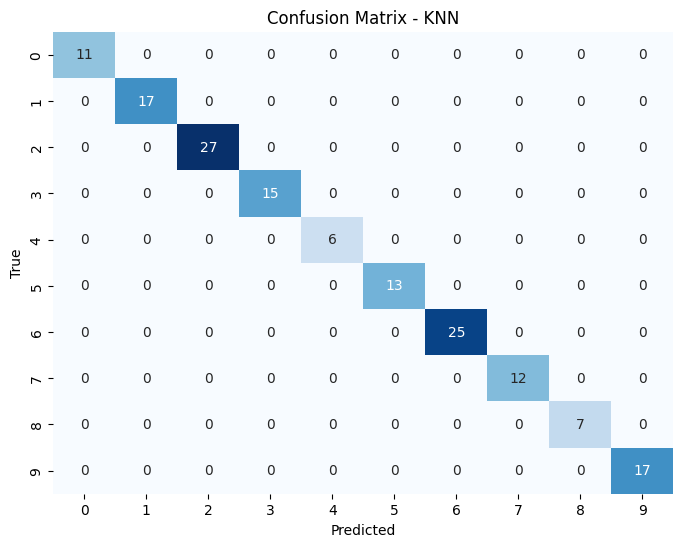

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(knn_confusion_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Confusion Matrix - KNN')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [19]:
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_precision = precision_score(y_test, y_pred_svm, average='weighted')
svm_recall = recall_score(y_test, y_pred_svm, average='weighted')
svm_confusion_matrix = confusion_matrix(y_test, y_pred_svm)
print('SVM Accuracy:',svm_accuracy)
print('SVM Precision:',svm_precision)
print('SVM Recall:',svm_recall)
print('SVM Confusion Matrix:',svm_confusion_matrix)

SVM Accuracy: 1.0
SVM Precision: 1.0
SVM Recall: 1.0
SVM Confusion Matrix: [[11  0  0  0  0  0  0  0  0  0]
 [ 0 17  0  0  0  0  0  0  0  0]
 [ 0  0 27  0  0  0  0  0  0  0]
 [ 0  0  0 15  0  0  0  0  0  0]
 [ 0  0  0  0  6  0  0  0  0  0]
 [ 0  0  0  0  0 13  0  0  0  0]
 [ 0  0  0  0  0  0 25  0  0  0]
 [ 0  0  0  0  0  0  0 12  0  0]
 [ 0  0  0  0  0  0  0  0  7  0]
 [ 0  0  0  0  0  0  0  0  0 17]]


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

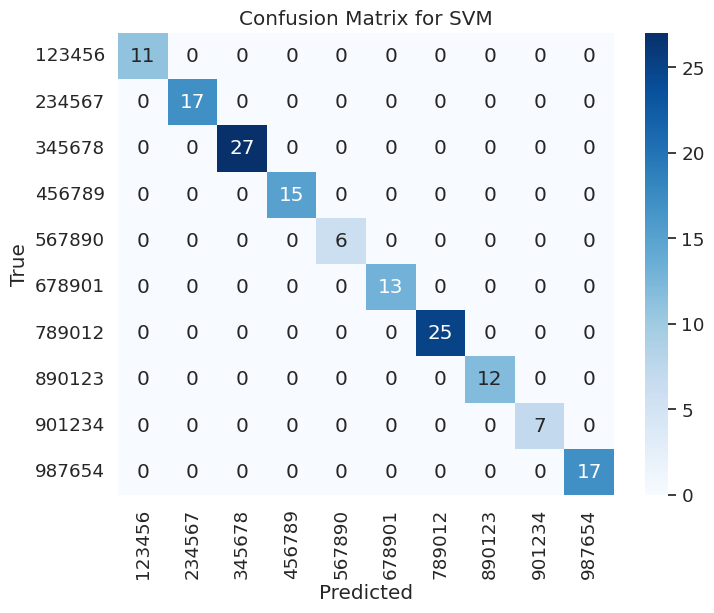

In [21]:
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(svm_confusion_matrix, annot=True, cmap='Blues', fmt='g',
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for SVM')
plt.show()

In [22]:
dec_tree_accuracy = accuracy_score(y_test, y_pred_dec_tree)
dec_tree_precision = precision_score(y_test, y_pred_dec_tree, average='weighted')
dec_tree_recall = recall_score(y_test, y_pred_dec_tree, average='weighted')
dec_tree_confusion_matrix = confusion_matrix(y_test, y_pred_dec_tree)
print('Decision Tree Accuracy:',dec_tree_accuracy)
print('Decision Tree Precision:',dec_tree_precision)
print('Decision Tree Recall:',dec_tree_recall)
print('Decision Tree Confusion Matrix:',dec_tree_confusion_matrix)

Decision Tree Accuracy: 1.0
Decision Tree Precision: 1.0
Decision Tree Recall: 1.0
Decision Tree Confusion Matrix: [[11  0  0  0  0  0  0  0  0  0]
 [ 0 17  0  0  0  0  0  0  0  0]
 [ 0  0 27  0  0  0  0  0  0  0]
 [ 0  0  0 15  0  0  0  0  0  0]
 [ 0  0  0  0  6  0  0  0  0  0]
 [ 0  0  0  0  0 13  0  0  0  0]
 [ 0  0  0  0  0  0 25  0  0  0]
 [ 0  0  0  0  0  0  0 12  0  0]
 [ 0  0  0  0  0  0  0  0  7  0]
 [ 0  0  0  0  0  0  0  0  0 17]]


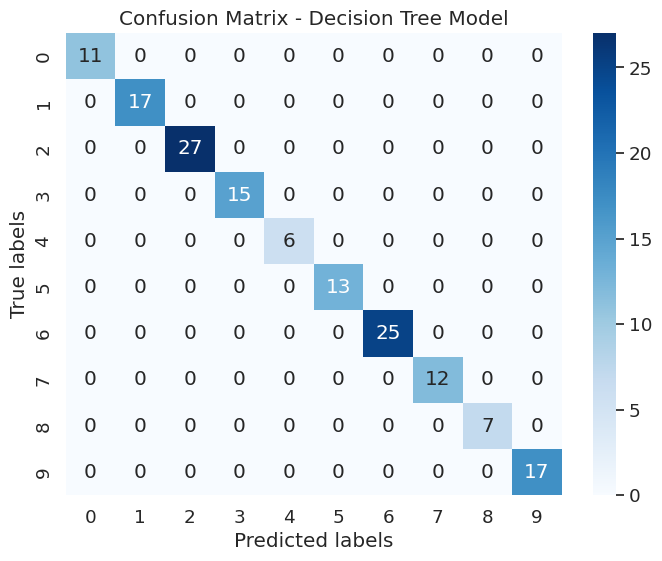

In [23]:
plt.figure(figsize=(8, 6))
sns.heatmap(dec_tree_confusion_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Decision Tree Model')
plt.show()

In [24]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [25]:
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf, average='weighted')
rf_recall = recall_score(y_test, y_pred_rf, average='weighted')
rf_f1 = f1_score(y_test, y_pred_rf, average='weighted')
print("Random Forest Metrics:")
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1-score:", rf_f1)

Random Forest Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


In [26]:
adaboost = AdaBoostClassifier(random_state=42)
adaboost.fit(X_train, y_train)
y_pred_ab = adaboost.predict(X_test)
ab_accuracy = accuracy_score(y_test, y_pred_ab)
ab_precision = precision_score(y_test, y_pred_ab, average='weighted')
ab_recall = recall_score(y_test, y_pred_ab, average='weighted')
ab_f1 = f1_score(y_test, y_pred_ab, average='weighted')
print("\nAdaBoost Metrics:")
print("Accuracy:", ab_accuracy)
print("Precision:", ab_precision)
print("Recall:", ab_recall)
print("F1-score:", ab_f1)


AdaBoost Metrics:
Accuracy: 0.6466666666666666
Precision: 0.4789358974358974
Recall: 0.6466666666666666
F1-score: 0.5338573021181717


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
